# 참고 문서
- [데이터 모델링 개념 & ERD 다이어그램 작성 총정리](https://inpa.tistory.com/entry/DB-%F0%9F%93%9A-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%AA%A8%EB%8D%B8%EB%A7%81-1N-%EA%B4%80%EA%B3%84-%F0%9F%93%88-ERD-%EB%8B%A4%EC%9D%B4%EC%96%B4%EA%B7%B8%EB%9E%A8)
- [ERD 표기법](https://hudi.blog/entity-relation-diagram/)

# 데이터 모델링
- 데이터 모델링이란 정보시스템 구축의 대상이 되는 업무 내용을 분석하여 이해하고 약속된 표기법에 의해 표현하는걸 의미한다. 그리고 이렇게 분석된 모델을 가지고 실제 데이터베이스를 생성하여 개발 및 데이터 관리에 사용된다.
- 특히 데이터를 추상화한 데이터 모델은 데이터베이스의 골격을 이해하고 그 이해를 바탕으로 SQL문장을 기능과 성능적인 측면에서 효율적으로 작성할 수 있기 때문에, 데이터 모델링은 데이터베이스 설계의 핵심 과정이기도 하다.

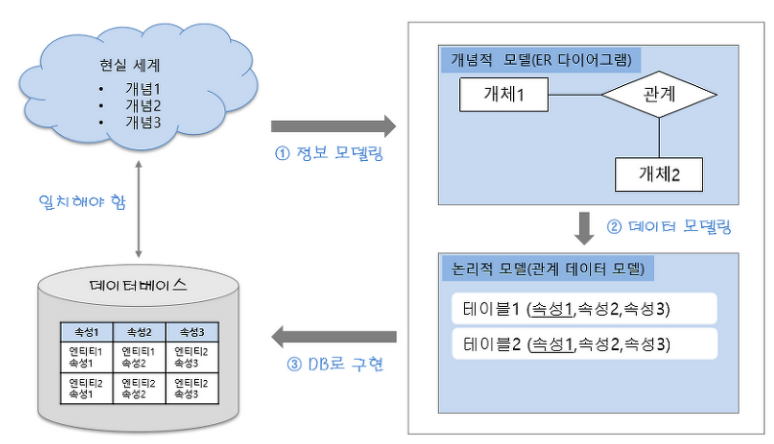

## 데이터 모델링 순서

### 1.업무파악(요구사항 수집 및 분석)
- 업무 파악은 어떠한 업무를 시작하기 전에 해당하는 업무에 대해서 파악하는 단계 이다.
- 모델링에 앞서 가장 먼저 해야 할 것은 어떠한 업무를 데이터화하여 모델링 할 것인지에 대한 요구사항 수집일 것이다.
- 업무파악을 하기 좋은 방법으로는 UI를 의뢰인과 함께 확인해 나아가는 는 것이다.
- 그리고 궁극적으로 만들어야 하는 것이 무엇인지 심도있게 알아보아야 한다.

### 2.개념적 데이터 모델링(ERD 작성)
- 개념적 모델링은 Entity 를 도출하고 ERD를 작성하는 단계이다.

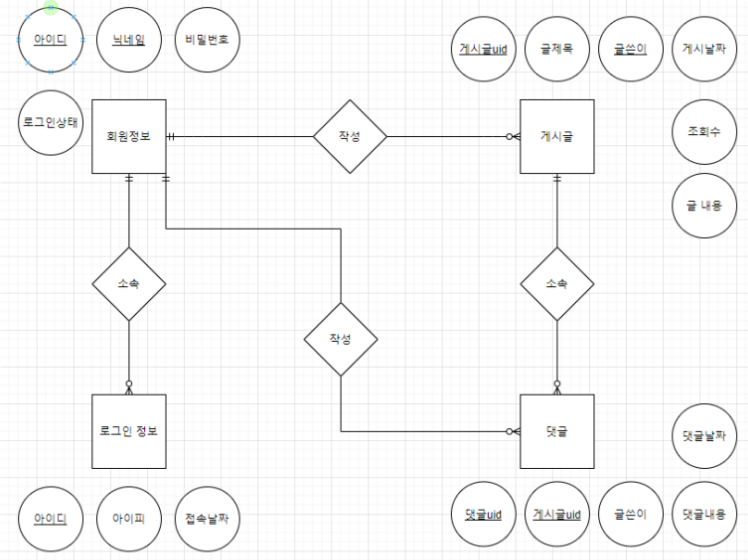

#### ERD
> ERD란 Entity-Relation Diagram (개체-관계 다이어그램) 의 준말이다. 데이터베이스 설계 단계에서 맨 처음 단계인 개념적 모델링 단계에서 ERD 를 작성하게 된다.

- Entity (개체)란     
현실에 존재하는 개별적으로 식별할 수 있는 물리적 또는 추상적인 개체를 의미한다.
  - 각 Entity 는 특징을 나타낼 수 있는 Attribute (속성) 들을 가지고 있다.
  - 예를 들어 ‘학생’ 이라는 Entity 는 ‘학번’, ‘학생 이름’ 등의 Attribute 를 가질 수 있고, ‘수업’ 이라는 Entity 는 ‘학수번호’, ‘수업 이름’ 등의 Attribute 를 가질 수 있다.

- ER(개체-관계) 모델은    
위에서 설명한 Entity 사이의 Relation (관계) 을 통해 현실 세계를 표현하기 위한 설계 방식이다.
  - 예를 들어 ‘학생’ 과 ‘수업’ Entity 끼리는 ‘수강하다’ 라는 관계를 맺을 수 있다.

### 3.논리적 데이터 모델링
- 논리적 모델링은 ERD 를 사용할 특정 DBMS 의 논리적 자료구조에 맞게 사상 (Mapping) 하는 과정이다.
- 예를들어 RDBMS 를 사용한다고 하면, ERD를 RDB로 사상한다. 테이블 설계와 정규화도 여기서 이루어진다.

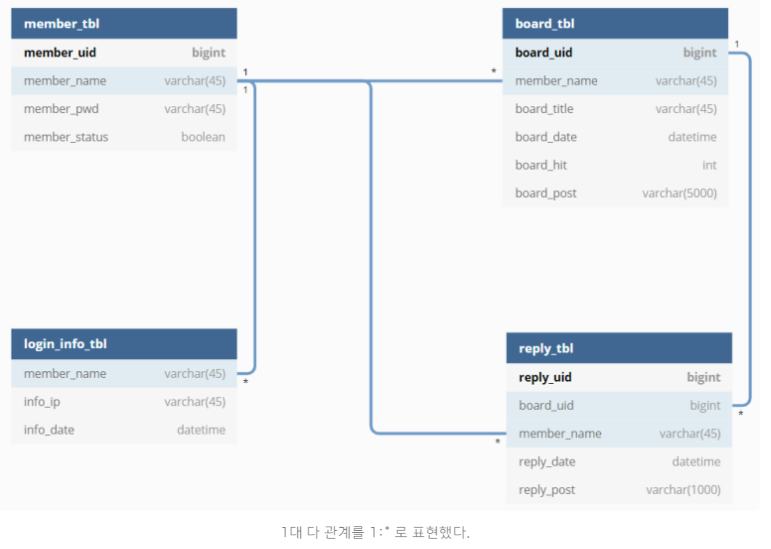

### 4.물리적 데이터 모델링
- 물리적 데이터 모델링은 최종적으로 데이터를 관리할 데이터 베이스를 선택하고, 선택한 데이터 베이스에 실제 테이블을 만드는 작업 을 말한다.

- [MySQL 제약 조건](https://dev-coco.tistory.com/55)

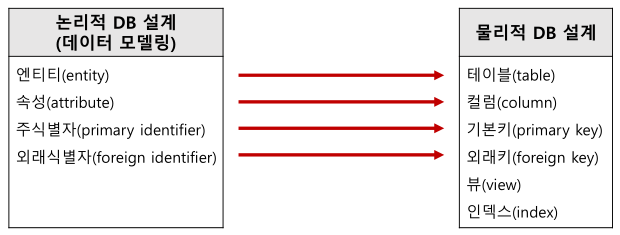

```sql
/* 테이블 생성 */

-- 회원정보
create table member_tbl (
  member_uid bigint primary key auto_increment,
  member_name varchar(45) unique not null,
  member_pwd varchar(45) not null,
  member_status boolean not null
);

-- 로그인기록정보
create table login_info_tbl(
  member_name varchar(45) not null,
  info_ip varchar(45) not null,
  info_date datetime not null,
  constraint fk_member_name_login_info foreign key (member_name) references member_tbl (member_name)
);

-- 게시판
create table board_tbl (
  board_uid bigint primary key auto_increment,
  member_name varchar(45) not null,
  board_title varchar(45) not null,
  board_date datetime not null,
  board_hit int not null,
  board_post varchar(5000) not null,
  constraint fk_member_name_board foreign key(member_name) references member_tbl(member_name)
);

-- 게시판 풀텍스트 인덱스 생성
create Fulltext index idx_title on board_tbl ( board_title );
create Fulltext index idx_post on board_tbl ( board_post );
-- show index from board_tbl ;

-- 댓글
create table reply_tbl (
  reply_uid bigint primary key auto_increment,
  board_uid bigint not null,
  member_name varchar(45) not null,
  reply_date datetime not null,
  reply_post varchar(1000) not null,
  foreign key(board_uid) references board_tbl(board_uid),
  foreign key(member_name) references member_tbl(member_name)
);

-- 댓글 풀텍스트 인덱스 생성
create Fulltext index idx_reply on reply_tbl ( reply_post );
```

## 데이터 모델링 절차 정리

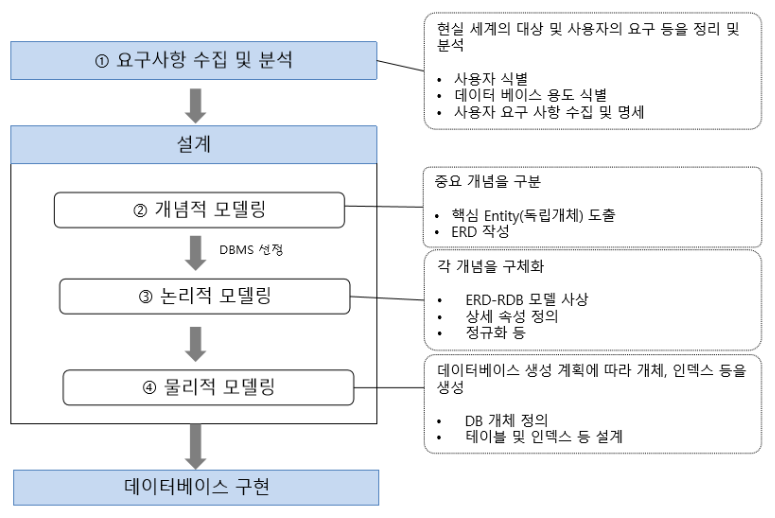

# ERD 그리기

#### ERD 표기법
ERD 표기법에는 Peter-Chen 표기법, IE 표기법 등이 있으며, 그 중에서 IE 표기법이 가장 많이 사용되고 있습니다.

- Entity
  - 엔티티는 정의 가능한 사물 또는 개념을 의미한다.
  - 데이터베이스의 테이블이 엔티티로 표현된다고 보면 된다.

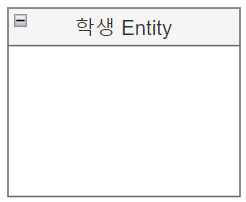

- Attribute:    
  - 엔티티에는 개체가 갖고있는 속성(Attribute)을 포함한다.
  - 데이터베이스의 테이블의 각 필드(컬럼)들이 엔티티 속성이라고 보면 된다.

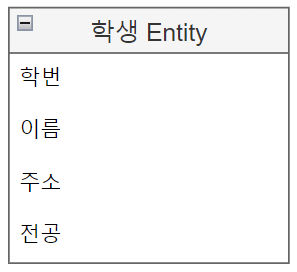

- 주 식별자(PK)
  - 데이터베이스 테이블의 Primary Key를 표현
  - 중복이 없고 NULL 값이 없는 유일한 값에 지정하는 식별자

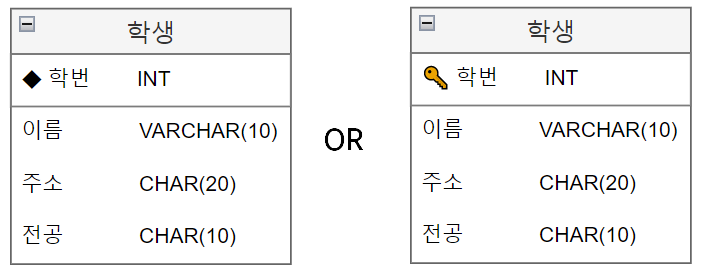

- 외래 식별자(FK)
  - 데이터베이스 테이블의 Foreign Key를 표현
  - 외래 식별자를 표시할 때에는 선을 이어주는데 개체와 관계를 따져 표시한다.

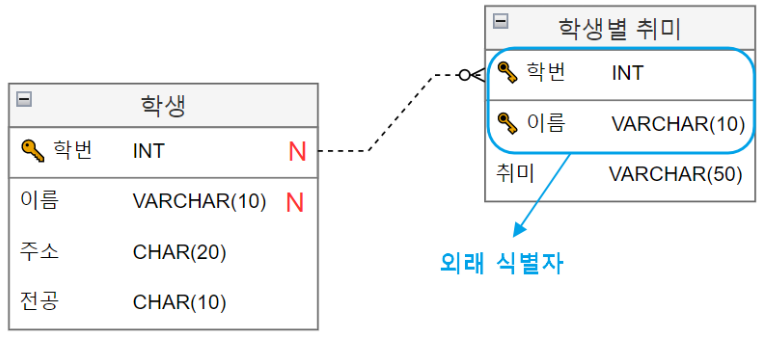

- Domain:  
  - 도메인은 속성의 값, 타입, 제약사항 등에 대한 갑의 범위를 표현하는 것이다.
  - 이때 데이터 타입을 명시할때, 데이터베이스가 지원하는 타입에 맞게 해야한다.

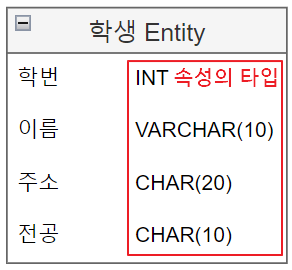

- 제약 조건 (NOT NULL)
  - 해당 속성에 들어갈 값에 Null 을 비허용한다면, N 혹은 NN을 적는다.
  - 만일 Null 허용한다면 N을 적지 않는다.

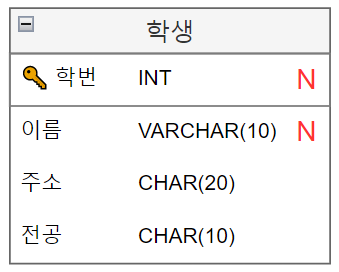

- Relation

부모 자식 관계에서 자식이 부모의 주 식별자를 외래 식별자로 참조해서 자신의 주 식별자로 설정

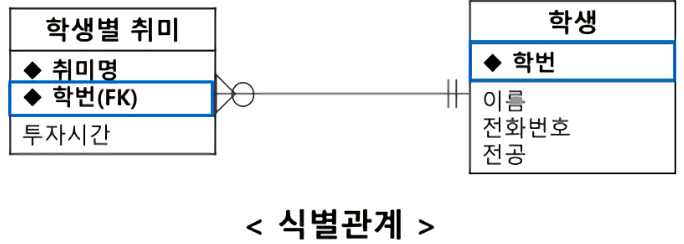

부모 자식 관계에서 자식이 부모의 주 식별자를 외래 식별자로 참조해서 일반 속성으로 사용.

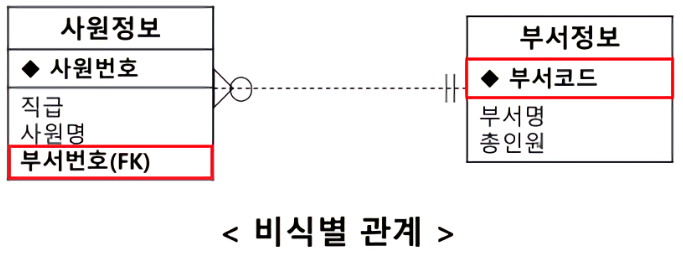

- Mapping Cardinality:     
개체와 개체간의 Mapping Cardinality (대응수) 란, 특정 Entity 가 상대 Entity 와 관계를 몇 회 맺을 수 있는지를 나타낸다.
  - 학생과 학급의 소속 관계를 살펴보자. 한 학급에는 여러 학생이 소속될 수 있지만, 한 학생이 여러 학급에 소속될 수는 없다. 이때, 학생과 학급의 Cardinality 는 N:1 이다.
  - 이번에는 학생과 학생의 짝꿍 관계를 살펴보자. 한 학생이 다른 학생과 짝꿍관계를 맺을 수 있는 관계의 경우의 수는 서로 1회밖에 없다. 따라서 이 관계의 Cardinality 는 1:1 이다.
  - 마지막으로 학생과 동아리간의 소속 관계를 살펴보자. 하나의 학생은 여러 동아리에 소속될 수 있다. 하나의 동아리 또한 여러 학생을 소속시킬 수 있다. 따라서 이 관계의 Cardinality 는 N:N 이다.

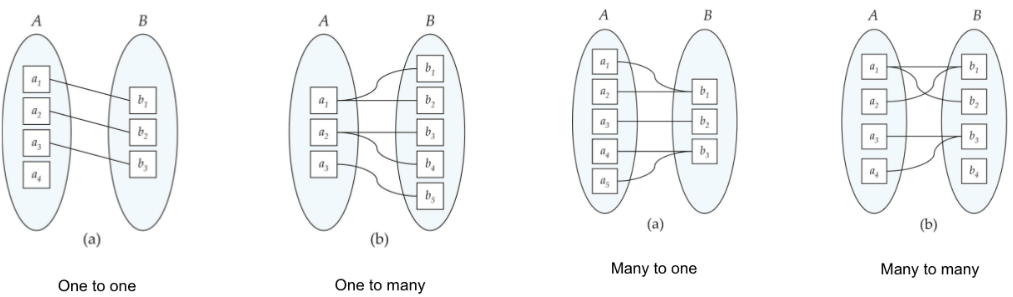

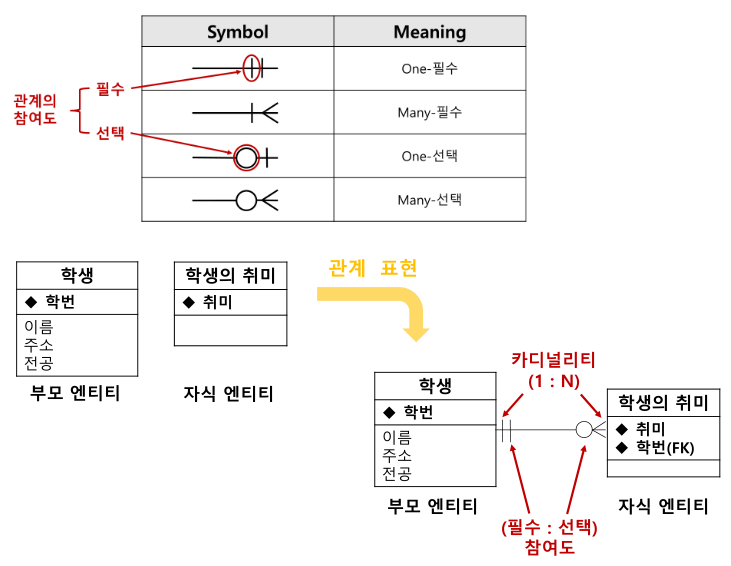

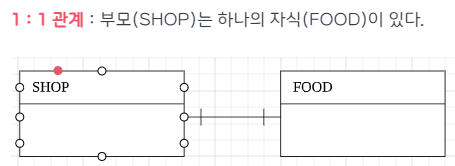

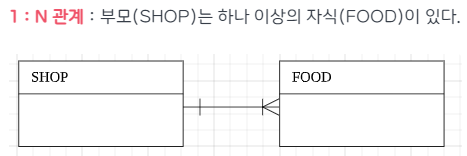

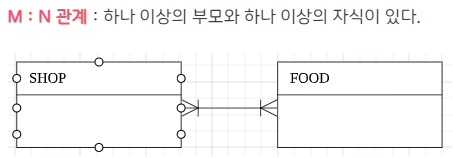

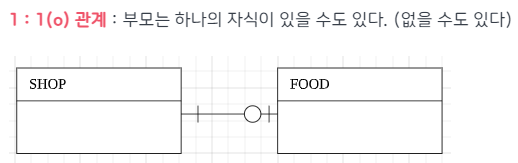

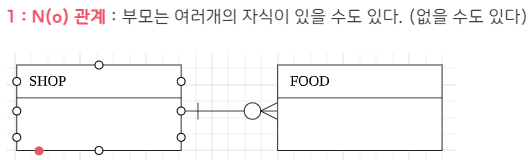

## ERD 다이어그램 툴 추천

- [ERD CLOUD](https://inpa.tistory.com/entry/ERD-CLOUD-%E2%98%81%EF%B8%8F-ERD-%EB%8B%A4%EC%9D%B4%EC%96%B4%EA%B7%B8%EB%9E%A8%EC%9D%84-%EC%98%A8%EB%9D%BC%EC%9D%B8%EC%97%90%EC%84%9C-%EA%B7%B8%EB%A0%A4%EB%B3%B4%EC%9E%90)

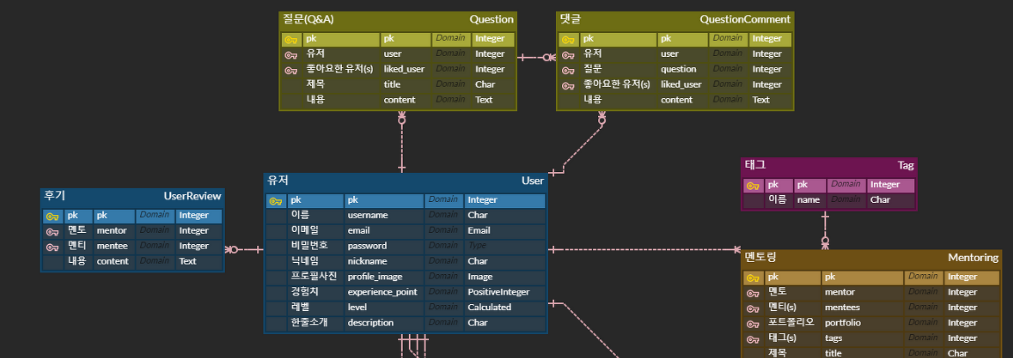

- [MySQL 워크벤치 ERD 생성](https://inpa.tistory.com/entry/MYSQL-%F0%9F%93%9A-%EC%9B%8C%ED%81%AC%EB%B2%A4%EC%B9%98%EC%97%90%EC%84%9C-%ED%85%8C%EC%9D%B4%EB%B8%94-ERD-%EC%83%9D%EC%84%B1%ED%95%98%EA%B8%B0)

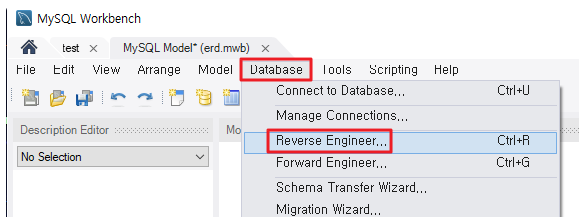

- DBeaver ERD 생성

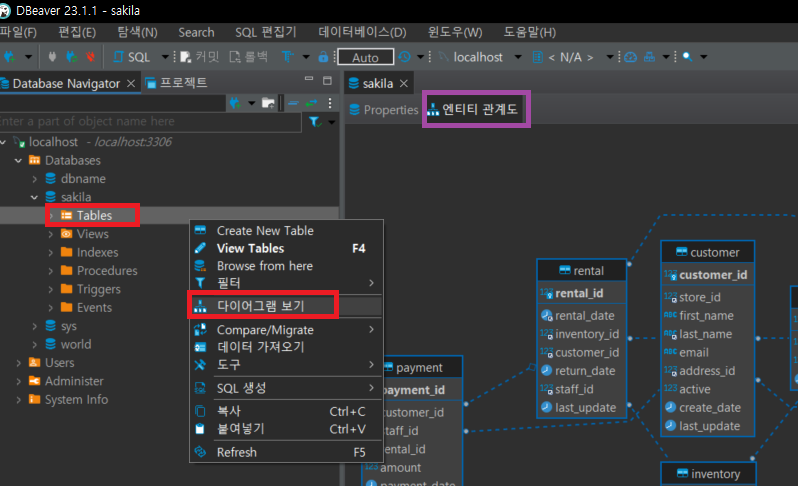

# [정규화](https://appmaster.io/ko/blog/deiteo-jeonggyuhwaran-mueosinga)
- 정규화(Normalization)의 기본 목표는 테이블 간에 중복된 데이타를 허용하지 않는다는 것이다.
- 중복된 데이터를 허용하지 않음으로써 무결성(Integrity)를 유지할 수 있으며, DB의 저장 용량 역시 줄일 수 있다.

## 데이터 정규화의 이점
- 데이터베이스 크기 감소
  - 정규화를 통해 반복되는 데이터 저장 공간을 줄일 수 있다.
  - 즉, 데이터베이스의 유지비용을 줄일 수 있다.
- 쿼리 단순화
  - 정규화된 테이블에서의 데이터 조회(쿼리)는 심플하며 빠르다.
  - 즉, 데이터베이스에서 유용한 정보를 추출하여 데이터를 분석하기 편리하다.
- 유지 보수 용이
  - 정규화를 통해 저장 공간 및 사용(쿼리)가 편리해 진다.

## [데이터베이스 정규화 절차](https://mangkyu.tistory.com/110)

### 제1정규형
> 제1 정규화란 테이블의 컬럼이 원자값(Atomic Value, 하나의 값)을 갖도록 테이블을 분해하는 것이다.

아래 테이블에서 추신수와 박세리는 여러 개의 취미를 가지고 있기 때문에 제1 정규형을 만족하지 못하고 있다. 그렇기 때문에 이를 제1 정규화하여 분해할 수 있다. 제1 정규화를 진행한 테이블은 아래와 같다.

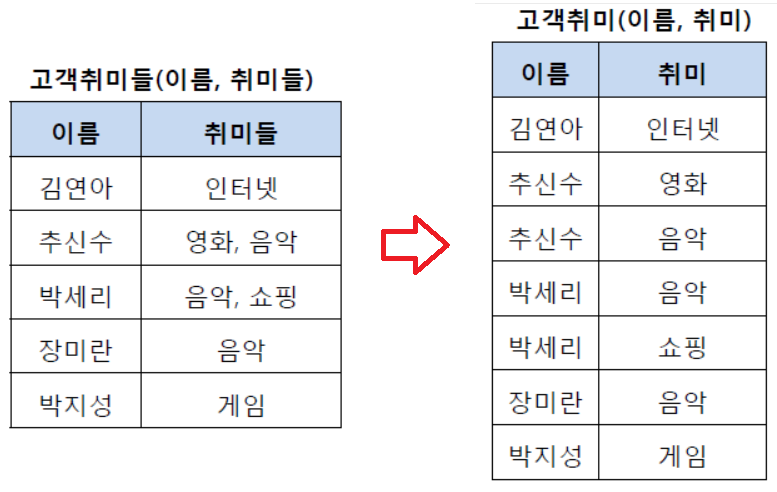

### 제2정규형
> 제2 정규화란 제1 정규화를 진행한 테이블에 대해 완전 함수 종속을 만족하도록 테이블을 분해하는 것이다.    
> 여기서 완전 함수 종속이라는 것은 기본키의 부분집합이 결정자가 되어선 안된다는 것을 의미한다.

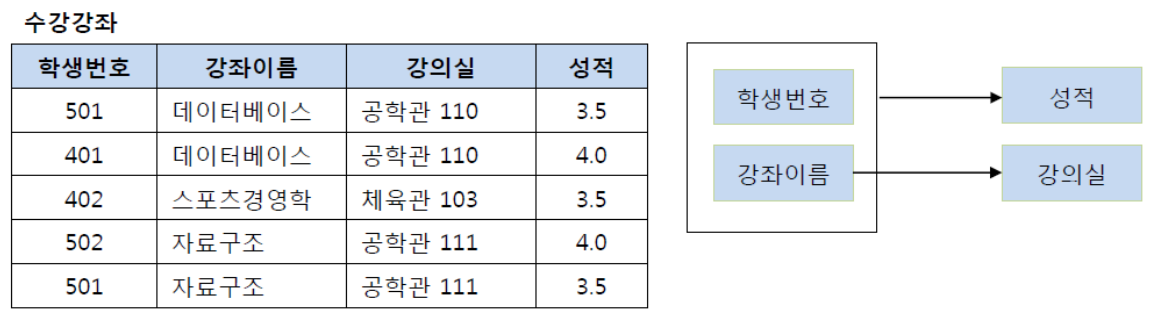

- 이 테이블에서 기본키는 (학생번호, 강좌이름)으로 복합키이다. 그리고 (학생번호, 강좌이름)인 기본키는 성적을 결정하고 있다. (학생번호, 강좌이름) --> (성적)
- 그런데 여기서 강의실이라는 컬럼은 기본키의 부분집합인 강좌이름에 의해 결정될 수 있다. (강좌이름) --> (강의실)

즉, 기본키(학생번호, 강좌이름)의 부분키인 강좌이름이 결정자이기 때문에 위의 테이블의 경우 다음과 같이 기존의 테이블에서 강의실을 분해하여 별도의 테이블로 관리하여 제2 정규형을 만족시킬 수 있다.

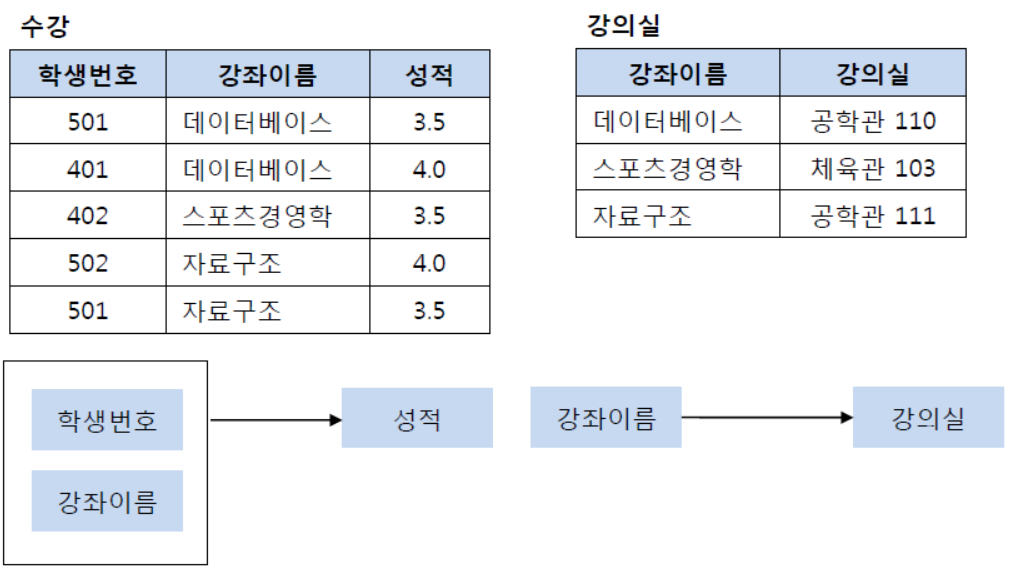

### 제3정규형
> 제3 정규화란 제2 정규화를 진행한 테이블에 대해 이행적 종속을 없애도록 테이블을 분해하는 것이다.     
> 여기서 이행적 종속이라는 것은 A -> B, B -> C가 성립할 때 A -> C가 성립되는 것을 의미한다.
예를 들어 아래와 같은 계절 학기 테이블을 살펴보자.

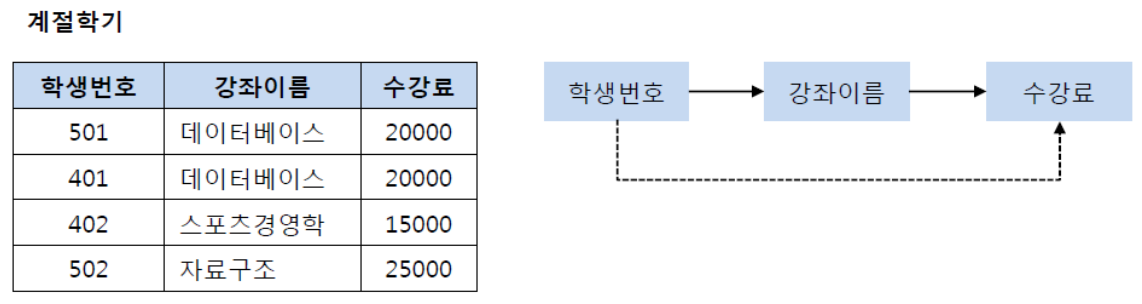

기존의 테이블에서 학생 번호는 강좌 이름을 결정하고 있고, 강좌 이름은 수강료를 결정하고 있다. 그렇기 때문에 이를 (학생 번호, 강좌 이름) 테이블과 (강좌 이름, 수강료) 테이블로 분해해야 한다.

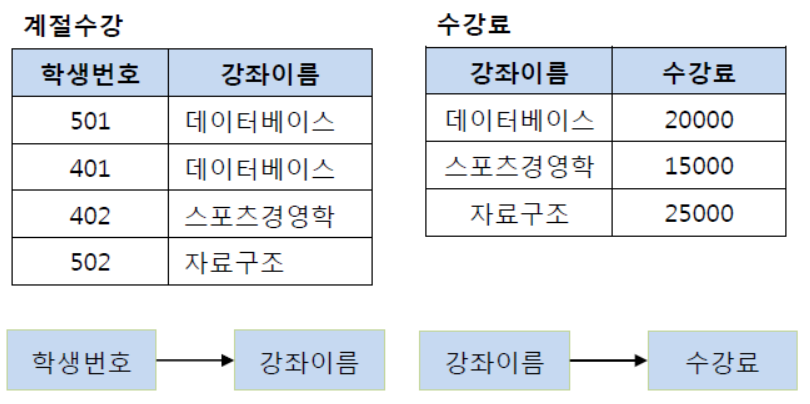

### BCNF 정규화
> BCNF 정규화란 제3 정규화를 진행한 테이블에 대해 모든 결정자가 후보키가 되도록 테이블을 분해하는 것이다.

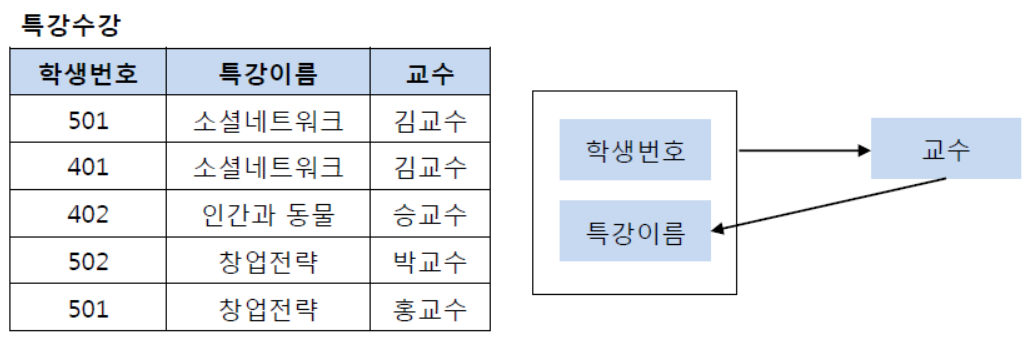

- 특강수강 테이블에서 기본키는 (학생번호, 특강이름)이다. 그리고 기본키 (학생번호, 특강이름)는 교수를 결정하고 있다.
- 또한 여기서 교수는 특강이름을 결정하고 있다.
- 그런데 문제는 교수가 특강이름을 결정하는 결정자이지만, 후보키가 아니라는 점이다.

그렇기 때문에 BCNF 정규화를 만족시키기 위해서 위의 테이블을 분해해야 하는데, 다음과 같이 특강신청 테이블과 특강교수 테이블로 분해할 수 있다.

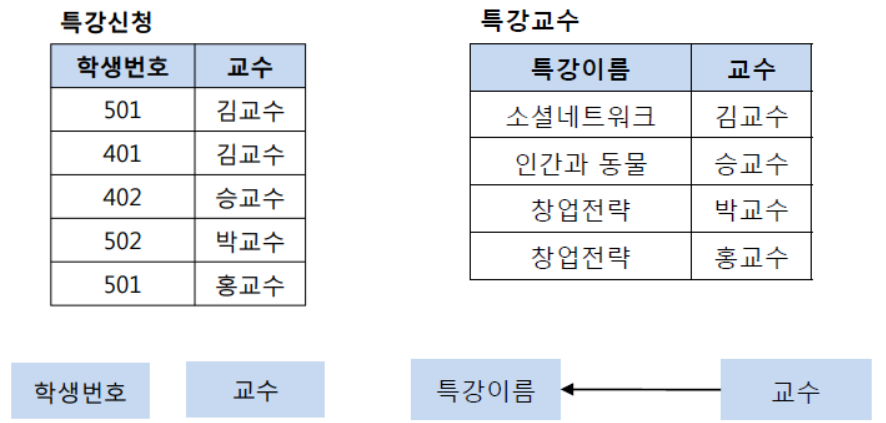